In [19]:
import geopandas as gpd
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import requests
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Replace Shapefile (part of geopandas)
shapefile_path = 'ne_10m_admin_1_states_provinces.shp'

# Read the Shapefile
gdf = gpd.read_file(shapefile_path)

# read GeoJSON file
output_geojson_path = 'output.geojson'

# Save as GeoJSON to load in later
gdf.to_file(output_geojson_path, driver='GeoJSON')

In [4]:
# Load the GeoJSON file for US states
fp = "output.geojson"
map_df = gpd.read_file(fp)

us_df = map_df.loc[map_df['iso_a2'] == 'US', :]

us_df.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
1235,Admin-1 states provinces,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."
1237,Admin-1 states provinces,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-117.03815 48.99251, -116.93818 48.9..."
1238,Admin-1 states provinces,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04816 48.99251, -115.83913 48.9..."
1241,Admin-1 states provinces,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-104.04757 48.99262, -103.96949 48.9..."
1243,Admin-1 states provinces,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.22609 48.99267, -97.15538 48.992..."


In [162]:
# extract election results and data clean

election_path = "../Resources/2020ElectionResults.xlsx"

# skip titles row
election_data = pd.read_excel(election_path, skiprows = 0)

# set index to state for better reading
#election_data = election_data.set_index('STATE')

#election_data = election_data[['TOTAL VOTES', 'Votes', '%', 'Votes.1', "%.1", 'Votes.2', "%.2"]]


# remove empty/blank rows
#election_data = election_data.dropna()

# rename columns for better readibility
election_data = election_data.rename(columns = {"TOTAL VOTES": 'Total Votes',
                                                "Votes": "Democrat Votes",
                                                "%": 'Democrat EV %',
                                                "EV": "Democrat EV",
                                                "Votes.1": "Republican Votes",
                                                "%.1": "Republican EV %",
                                                "EV.1": "Replican EV",
                                                "Votes.2": "Other Votes",
                                                "%.2": "Other EV %",
                                                "EV.2": "Other EV"})

# fills NaNs as 0s so I can sum properly due to Maine and Nebraska (can't remove NaN or else it removes everything)
election_data = election_data.fillna(0)

state_names = []

# create a list of states to map later
for index, rows in election_data.iterrows():
    state_names.append(rows['STATE'])


election_data


,STATE,Total Votes,Democrat Votes,Democrat EV %,Democrat EV,Republican Votes,Republican EV %,Replican EV,Other Votes,Other EV %,Other EV
0,Alabama,2323282,849624,0.3657,0.0,1441170,0.6203,9.0,32488,0.0140,0.0
1,Alaska,359530,153778,0.4277,0.0,189951,0.5283,3.0,15801,0.0439,0.0
2,Arizona,3387326,1672143,0.4936,11.0,1661686,0.4906,0.0,53497,0.0158,0.0
3,Arkansas,1219069,423932,0.3478,0.0,760647,0.6240,6.0,34490,0.0283,0.0
4,California,17500881,11110250,0.6348,55.0,6006429,0.3432,0.0,384202,0.0220,0.0
5,Colorado,3256952,1804352,0.5540,9.0,1364607,0.4190,0.0,87993,0.0270,0.0
6,Connecticut,1824280,1080680,0.5924,7.0,715291,0.3921,0.0,28309,0.0155,0.0
7,Delaware,504010,296268,0.5878,3.0,200603,0.3980,0.0,7139,0.0142,0.0
8,District of Columbia,344356,317323,0.9215,3.0,18586,0.0540,0.0,8447,0.0245,0.0
9,Florida,11067456,5297045,0.4786,0.0,5668731,0.5122,29.0,101680,0.0092,0.0


In [163]:
clean_data = election_data.copy(deep=True)

for index, rows in clean_data.iterrows():
    if (rows['STATE'] == 'CD-1') | (rows['STATE'] == 'CD-2') | (rows['STATE'] == 'CD-3'):
        clean_data.loc[index,['Total Votes', 'Democrat Votes', 'Democrat EV %', 'Republican Votes', 'Republican EV %', 'Other Votes', 'Other EV %', 'Other EV']] = 0
    
#create a list of colors (red or blue) to show visually on map later
blue_states = [] # democrat states
red_states = [] # republican states
totals = clean_data.sum()
clean_data.loc[len(clean_data)] = totals

for index, rows in clean_data.iterrows():   
    if (index == 56):
        clean_data.loc[index,['STATE']] = 'Totals'
        
        # fix democrat data visual
        democrat_percent = (clean_data.at[index,'Democrat Votes'] / clean_data.at[index,'Total Votes'])
        clean_data.at[index,'Democrat EV %'] = democrat_percent
        clean_data['Democrat EV %'] = clean_data['Democrat EV %'] * 100
        #clean_data['Democrat EV %'] = clean_data['Democrat EV %'].map("{:.2f}%".format)
        
        
        # fix republican data visual
        republican_percent = (clean_data.at[index,'Republican Votes'] / clean_data.at[index,'Total Votes'])
        clean_data.at[index,'Republican EV %'] = republican_percent
        clean_data['Republican EV %'] = clean_data['Republican EV %'] * 100
        
        # fix other data visual
        other_percent = (clean_data.at[index,'Other Votes'] / clean_data.at[index,'Total Votes'])
        clean_data.at[index,'Other EV %'] = other_percent
        clean_data['Other EV %'] = clean_data['Other EV %'] * 100
        
    else:    
        # if democrat wins
        if (rows['Democrat EV %'] > rows['Republican EV %']):
            blue_states.append(rows['STATE'])
        elif (rows['Democrat EV %'] < rows['Republican EV %']):
            red_states.append(rows['STATE'])

clean_data

,STATE,Total Votes,Democrat Votes,Democrat EV %,Democrat EV,Republican Votes,Republican EV %,Replican EV,Other Votes,Other EV %,Other EV
0,Alabama,2323282,849624,36.570000,0.0,1441170,62.030000,9.0,32488,1.400000,0.0
1,Alaska,359530,153778,42.770000,0.0,189951,52.830000,3.0,15801,4.390000,0.0
2,Arizona,3387326,1672143,49.360000,11.0,1661686,49.060000,0.0,53497,1.580000,0.0
3,Arkansas,1219069,423932,34.780000,0.0,760647,62.400000,6.0,34490,2.830000,0.0
4,California,17500881,11110250,63.480000,55.0,6006429,34.320000,0.0,384202,2.200000,0.0
5,Colorado,3256952,1804352,55.400000,9.0,1364607,41.900000,0.0,87993,2.700000,0.0
6,Connecticut,1824280,1080680,59.240000,7.0,715291,39.210000,0.0,28309,1.550000,0.0
7,Delaware,504010,296268,58.780000,3.0,200603,39.800000,0.0,7139,1.420000,0.0
8,District of Columbia,344356,317323,92.150000,3.0,18586,5.400000,0.0,8447,2.450000,0.0
9,Florida,11067456,5297045,47.860000,0.0,5668731,51.220000,29.0,101680,0.920000,0.0


In [164]:
ev_pct_df = pd.DataFrame({'Vote percentage': [democrat_percent*100, republican_percent*100, other_percent*100],
                         'Parties': ['Democrat', 'Republican', 'Other']})

ev_pct_df = ev_pct_df.set_index('Parties')
ev_pct_df

,Vote percentage
Parties,
Democrat,51.313678
Republican,46.860967
Other,1.825356


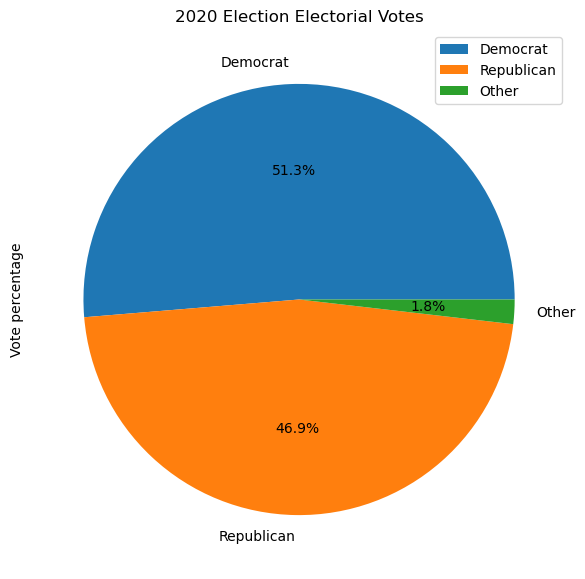

In [165]:
ev_pct_df.plot.pie(y = 'Vote percentage', autopct = '%1.1f%%', figsize = (7, 7)) 
plt.title('2020 Election Electorial Votes')
plt.legend(loc=1)
plt.show()

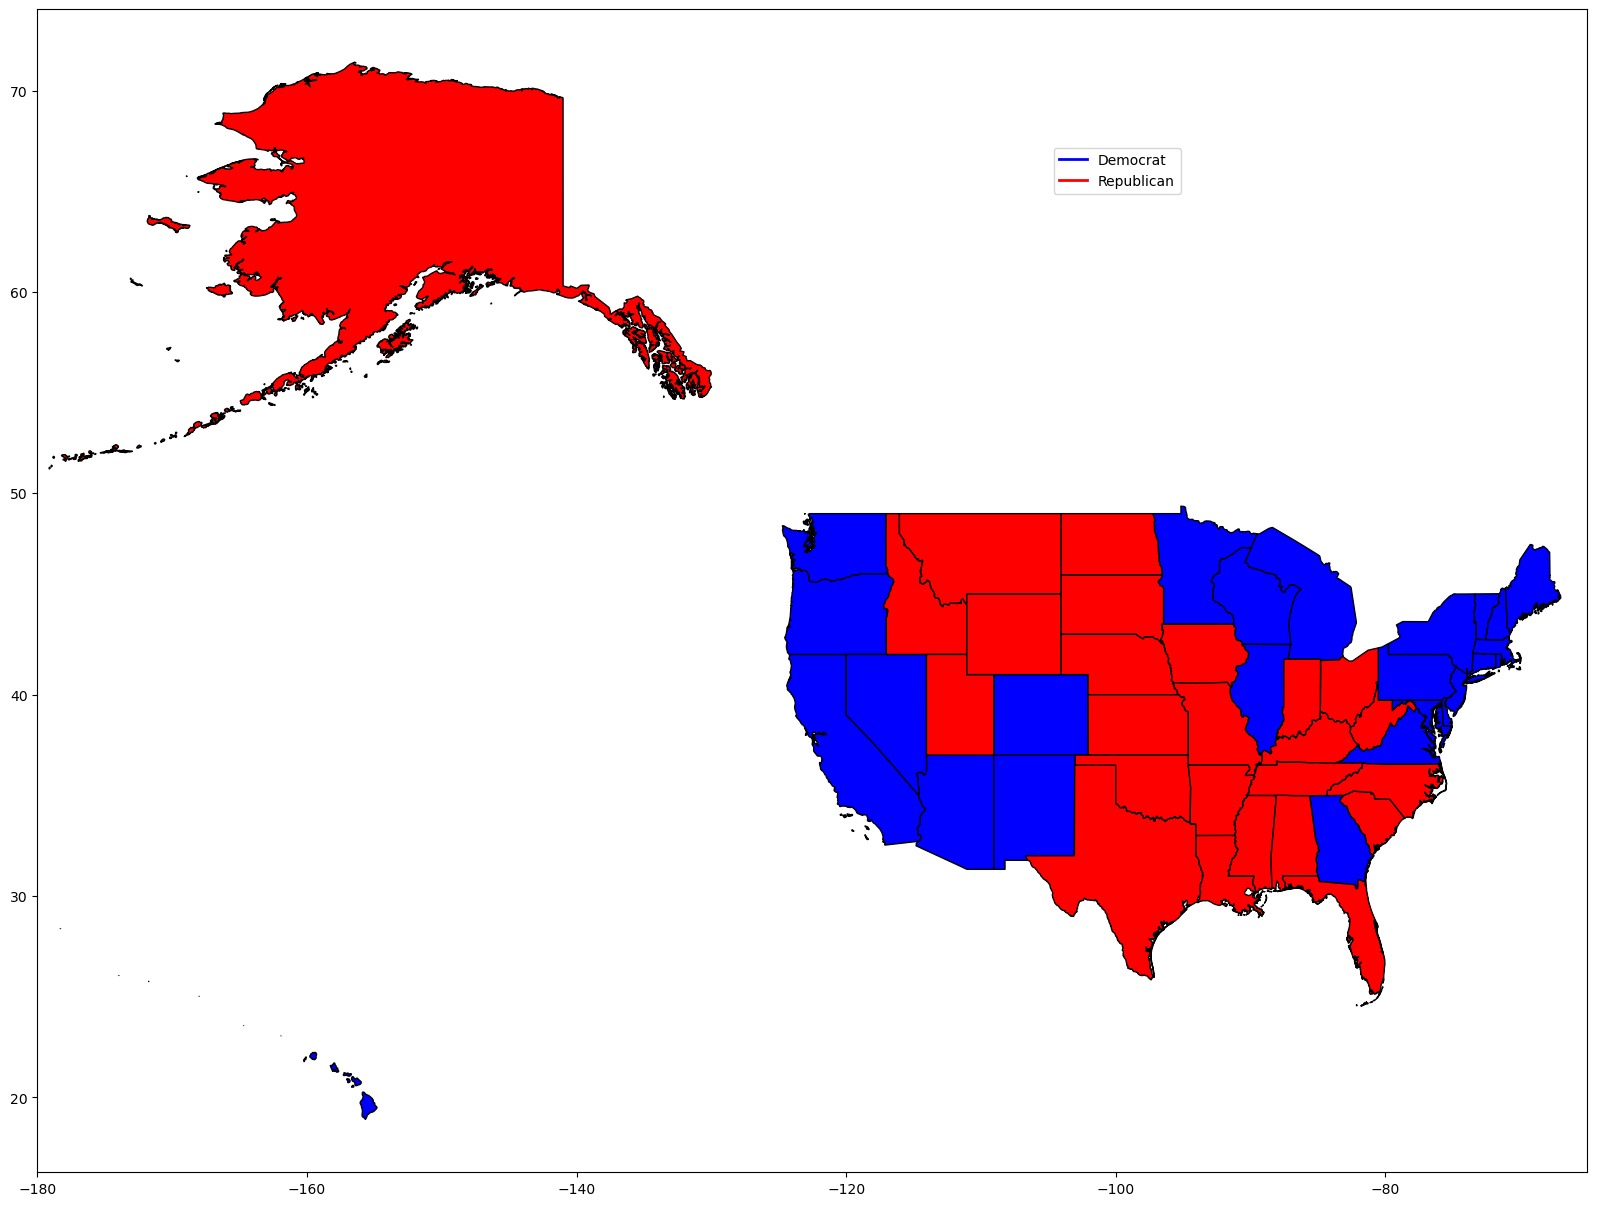

In [166]:
democrat_states = {'state': blue_states}
republican_states = {'state': red_states}


democrat_df = pd.DataFrame(democrat_states)
republican_df = pd.DataFrame(republican_states)

democrat_map = us_df[us_df['name'].isin(democrat_df['state']) == True]
republican_map = us_df[us_df['name'].isin(republican_df['state']) == True]

# Plot the map with both Democrat and Republican states
fig, ax = plt.subplots(figsize=(20, 20))

# Plot Democrat states in blue
democrat_map.plot(ax=ax, color='blue', edgecolor='black', linewidth=1,label='Democrat')

# Plot Republican states in red
republican_map.plot(ax=ax, color='red', edgecolor='black', linewidth=1,label='Republican')

#set size
plt.xlim(-180, -65)

# Add legend
legend_handles = [Line2D([0], [0], color='blue', lw=2, label='Democrat'),
                  Line2D([0], [0], color='red', lw=2, label='Republican')]

# Add legend for the entire figure
fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(0., 0.5, 0.7, 0.22))

# Show the plot
plt.show()


## Read API file

In [167]:
url = 'https://data.cdc.gov/resource/8xkx-amqh.json?$query=SELECT%0A%20%20%60date%60%2C%0A%20%20%60fips%60%2C%0A%20%20%60mmwr_week%60%2C%0A%20%20%60recip_county%60%2C%0A%20%20%60recip_state%60%2C%0A%20%20%60completeness_pct%60%2C%0A%20%20%60administered_dose1_recip%60%2C%0A%20%20%60administered_dose1_pop_pct%60%2C%0A%20%20%60administered_dose1_recip_5plus%60%2C%0A%20%20%60administered_dose1_recip_5pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_12plus%60%2C%0A%20%20%60administered_dose1_recip_12pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_18plus%60%2C%0A%20%20%60administered_dose1_recip_18pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_65plus%60%2C%0A%20%20%60administered_dose1_recip_65pluspop_pct%60%2C%0A%20%20%60series_complete_yes%60%2C%0A%20%20%60series_complete_pop_pct%60%2C%0A%20%20%60series_complete_5plus%60%2C%0A%20%20%60series_complete_5pluspop_pct%60%2C%0A%20%20%60series_complete_5to17%60%2C%0A%20%20%60series_complete_5to17pop_pct%60%2C%0A%20%20%60series_complete_12plus%60%2C%0A%20%20%60series_complete_12pluspop_pct%60%2C%0A%20%20%60series_complete_18plus%60%2C%0A%20%20%60series_complete_18pluspop_pct%60%2C%0A%20%20%60series_complete_65plus%60%2C%0A%20%20%60series_complete_65pluspop_pct%60%2C%0A%20%20%60booster_doses%60%2C%0A%20%20%60booster_doses_vax_pct%60%2C%0A%20%20%60booster_doses_5plus%60%2C%0A%20%20%60booster_doses_5plus_vax_pct%60%2C%0A%20%20%60booster_doses_12plus%60%2C%0A%20%20%60booster_doses_12plus_vax_pct%60%2C%0A%20%20%60booster_doses_18plus%60%2C%0A%20%20%60booster_doses_18plus_vax_pct%60%2C%0A%20%20%60booster_doses_50plus%60%2C%0A%20%20%60booster_doses_50plus_vax_pct%60%2C%0A%20%20%60booster_doses_65plus%60%2C%0A%20%20%60booster_doses_65plus_vax_pct%60%2C%0A%20%20%60second_booster_50plus%60%2C%0A%20%20%60second_booster_50plus_vax_pct%60%2C%0A%20%20%60second_booster_65plus%60%2C%0A%20%20%60second_booster_65plus_vax_pct%60%2C%0A%20%20%60svi_ctgy%60%2C%0A%20%20%60series_complete_pop_pct_svi%60%2C%0A%20%20%60series_complete_5pluspop_pct_svi%60%2C%0A%20%20%60series_complete_5to17pop_pct_svi%60%2C%0A%20%20%60series_complete_12pluspop_pct_svi%60%2C%0A%20%20%60series_complete_18pluspop_pct_svi%60%2C%0A%20%20%60series_complete_65pluspop_pct_svi%60%2C%0A%20%20%60metro_status%60%2C%0A%20%20%60series_complete_pop_pct_ur_equity%60%2C%0A%20%20%60series_complete_5pluspop_pct_ur_equity%60%2C%0A%20%20%60series_complete_5to17pop_pct_ur_equity%60%2C%0A%20%20%60series_complete_12pluspop_pct_ur_equity%60%2C%0A%20%20%60series_complete_18pluspop_pct_ur_equity%60%2C%0A%20%20%60series_complete_65pluspop_pct_ur_equity%60%2C%0A%20%20%60booster_doses_vax_pct_svi%60%2C%0A%20%20%60booster_doses_12plusvax_pct_svi%60%2C%0A%20%20%60booster_doses_18plusvax_pct_svi%60%2C%0A%20%20%60booster_doses_65plusvax_pct_svi%60%2C%0A%20%20%60booster_doses_vax_pct_ur_equity%60%2C%0A%20%20%60booster_doses_12plusvax_pct_ur_equity%60%2C%0A%20%20%60booster_doses_18plusvax_pct_ur_equity%60%2C%0A%20%20%60booster_doses_65plusvax_pct_ur_equity%60%2C%0A%20%20%60census2019%60%2C%0A%20%20%60census2019_5pluspop%60%2C%0A%20%20%60census2019_5to17pop%60%2C%0A%20%20%60census2019_12pluspop%60%2C%0A%20%20%60census2019_18pluspop%60%2C%0A%20%20%60census2019_65pluspop%60%2C%0A%20%20%60bivalent_booster_5plus%60%2C%0A%20%20%60bivalent_booster_5plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_12plus%60%2C%0A%20%20%60bivalent_booster_12plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_18plus%60%2C%0A%20%20%60bivalent_booster_18plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_65plus%60%2C%0A%20%20%60bivalent_booster_65plus_pop_pct%60'

cdc_data = requests.get(url).json()


In [168]:
cdc_df = pd.DataFrame(cdc_data)
cdc_df = cdc_df.rename(columns = {'recip_state': 'State Abbv.',
                                 'series_complete_pop_pct': '% of People Fully Vaccinated'})
cdc_df

,date,fips,mmwr_week,recip_county,State Abbv.,completeness_pct,administered_dose1_recip,administered_dose1_pop_pct,administered_dose1_recip_5plus,administered_dose1_recip_5pluspop_pct,...,census2019_18pluspop,census2019_65pluspop,bivalent_booster_5plus,bivalent_booster_5plus_pop_pct,bivalent_booster_12plus,bivalent_booster_12plus_pop_pct,bivalent_booster_18plus,bivalent_booster_18plus_pop_pct,bivalent_booster_65plus,bivalent_booster_65plus_pop_pct
0,2023-05-10T00:00:00.000,55129,19,Washburn County,WI,96.7,11123,70.8,11097,73.9,...,12758,4304,3978,26.5,3955,28.6,3899,30.6,2588,60.1
1,2023-05-10T00:00:00.000,19173,19,Taylor County,IA,97.3,3149,51.4,3145,55,...,4687,1392,841,14.7,841,16.3,834,17.8,588,42.2
2,2023-05-10T00:00:00.000,36059,19,Nassau County,NY,97.5,1391226,95,1384503,95,...,1065968,246690,236202,18.4,231748,19.8,224931,21.1,109947,44.6
3,2023-05-10T00:00:00.000,48281,19,Lampasas County,TX,98.9,11678,54.5,11660,57.4,...,16799,4322,1951,9.6,1947,10.5,1925,11.5,1229,28.4
4,2023-05-10T00:00:00.000,26145,19,Saginaw County,MI,94,104075,54.6,NaN,NaN,...,149676,37414,15618,8.7,15448,9.4,15112,10.1,7921,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-10T00:00:00.000,38035,19,Grand Forks County,ND,92.7,51304,73.9,50840,78.6,...,54757,9249,12654,19.6,12323,20.9,11825,21.6,5355,57.9
996,2023-05-10T00:00:00.000,28039,19,George County,MS,98.1,11726,47.9,11716,51.7,...,18022,3579,801,3.5,800,4,795,4.4,522,14.6
997,2023-05-10T00:00:00.000,24019,19,Dorchester County,MD,98.2,21870,68.5,21816,72.3,...,25219,7063,5557,18.4,5538,20.1,5475,21.7,3213,45.5
998,2023-05-10T00:00:00.000,40021,19,Cherokee County,OK,93.8,33752,69.4,33714,73.4,...,38112,8264,3430,7.5,3404,8.2,3369,8.8,1945,23.5


In [169]:
state_df = cdc_df[['State Abbv.', '% of People Fully Vaccinated']]
state_df['% of People Fully Vaccinated'] = state_df['% of People Fully Vaccinated'].astype(float)
state_df = state_df.dropna(how = 'any')
avg_state_vax_pct = state_df.groupby('State Abbv.').mean()
avg_state_vax_pct['State'] = avg_state_vax_pct.index.map(state_mapping)
avg_state_vax_pct = avg_state_vax_pct.reset_index()
avg_state_vax_pct


,State Abbv.,% of People Fully Vaccinated,State
0,AK,71.544444,Alaska
1,AL,41.686667,Alabama
2,AR,49.370588,Arkansas
3,AZ,90.550000,Arizona
4,CA,64.585714,California
5,CO,62.748000,Colorado
6,CT,80.650000,Connecticut
7,DE,59.200000,Delaware
8,FL,53.834783,Florida
9,GA,44.612500,Georgia


In [170]:
# Dictionary mapping state abbreviations to full names
state_mapping = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi',
    'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
    'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin',
    'WV': 'West Virginia', 'WY': 'Wyoming'
}


In [205]:
vax_republican_states = []
vax_democrat_states = []

vax_republican_state_pct = []
vax_democrat_state_pct = []
"""
for index, rows in avg_state_vax_pct.iterrows():
    vax_republican_df =avg_state_vax_pct[avg_state_vax_pct['State'].isin(republican_states['state'])]
    vax_democrat_df = avg_state_vax_pct[avg_state_vax_pct['State'].isin(democrat_states['state'])]
    

for index in range(len(vax_republican_df)):
    print(vax_republican_df['State'])
 
    try:
        vax_republican_states.append(vax_republican_df.loc[index, 'State'])
    except KeyError:
        pass  # Handle KeyError if necessary

for index in range(len(vax_democrat_df)):
    #try:
    vax_democrat_states.append(vax_democrat_df.loc[index, 'State'])
    #except KeyError:
    #    pass  # Handle KeyError if necessary


democrat_states = {'state': blue_states}
#republican_states = {'state': red_states}
print(democrat_states)
print(vax_democrat_states)
"""
for index, row in avg_state_vax_pct.iterrows():
    state = row['State']
    vax_pct = row['% of People Fully Vaccinated']
   
    if state in republican_states['state']:
        vax_republican_states.append(state)
        vax_republican_state_pct.append(vax_pct)
        
    elif state in democrat_states['state']:
        vax_democrat_states.append(state)
        vax_democrat_state_pct.append(vax_pct)


,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
1235,Admin-1 states provinces,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."
1243,Admin-1 states provinces,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.22609 48.99267, -97.15538 48.992..."
1245,Admin-1 states provinces,2,USA-3562,3562,US-MI,http://en.wikipedia.org/wiki/Michigan,US,1,Michigan,MI|Mich.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.49896 47.99509, -89.46185 47.994..."
1247,Admin-1 states provinces,2,USA-3560,3560,US-PA,http://en.wikipedia.org/wiki/Pennsylvania,US,1,Pennsylvania,Commonwealth of Pennsylvania|PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-80.52023 42.32378, -80.50415 42.326..."
1248,Admin-1 states provinces,2,USA-3559,3559,US-NY,http://en.wikipedia.org/wiki/New_York,US,3,New York,NY|N.Y.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-79.76301 42.53770, -79.63302 ..."
1250,Admin-1 states provinces,2,USA-3540,3540,US-VT,http://en.wikipedia.org/wiki/Vermont,US,1,Vermont,VT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-73.35134 45.00463, -73.29942 45.004..."
1251,Admin-1 states provinces,2,USA-3538,3538,US-NH,http://en.wikipedia.org/wiki/New_Hampshire,US,1,New Hampshire,NH|N.H.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-71.50585 45.01373, -71.50408 45.013..."
1252,Admin-1 states provinces,2,USA-3561,3561,US-ME,http://en.wikipedia.org/wiki/Maine,US,6,Maine,ME|Maine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-71.08495 45.30429, -71.06421 ..."
1254,Admin-1 states provinces,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-111.00627 31.32718, -111.06712 31.3..."
1257,Admin-1 states provinces,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-114.72428 32.71284, -114.7645..."


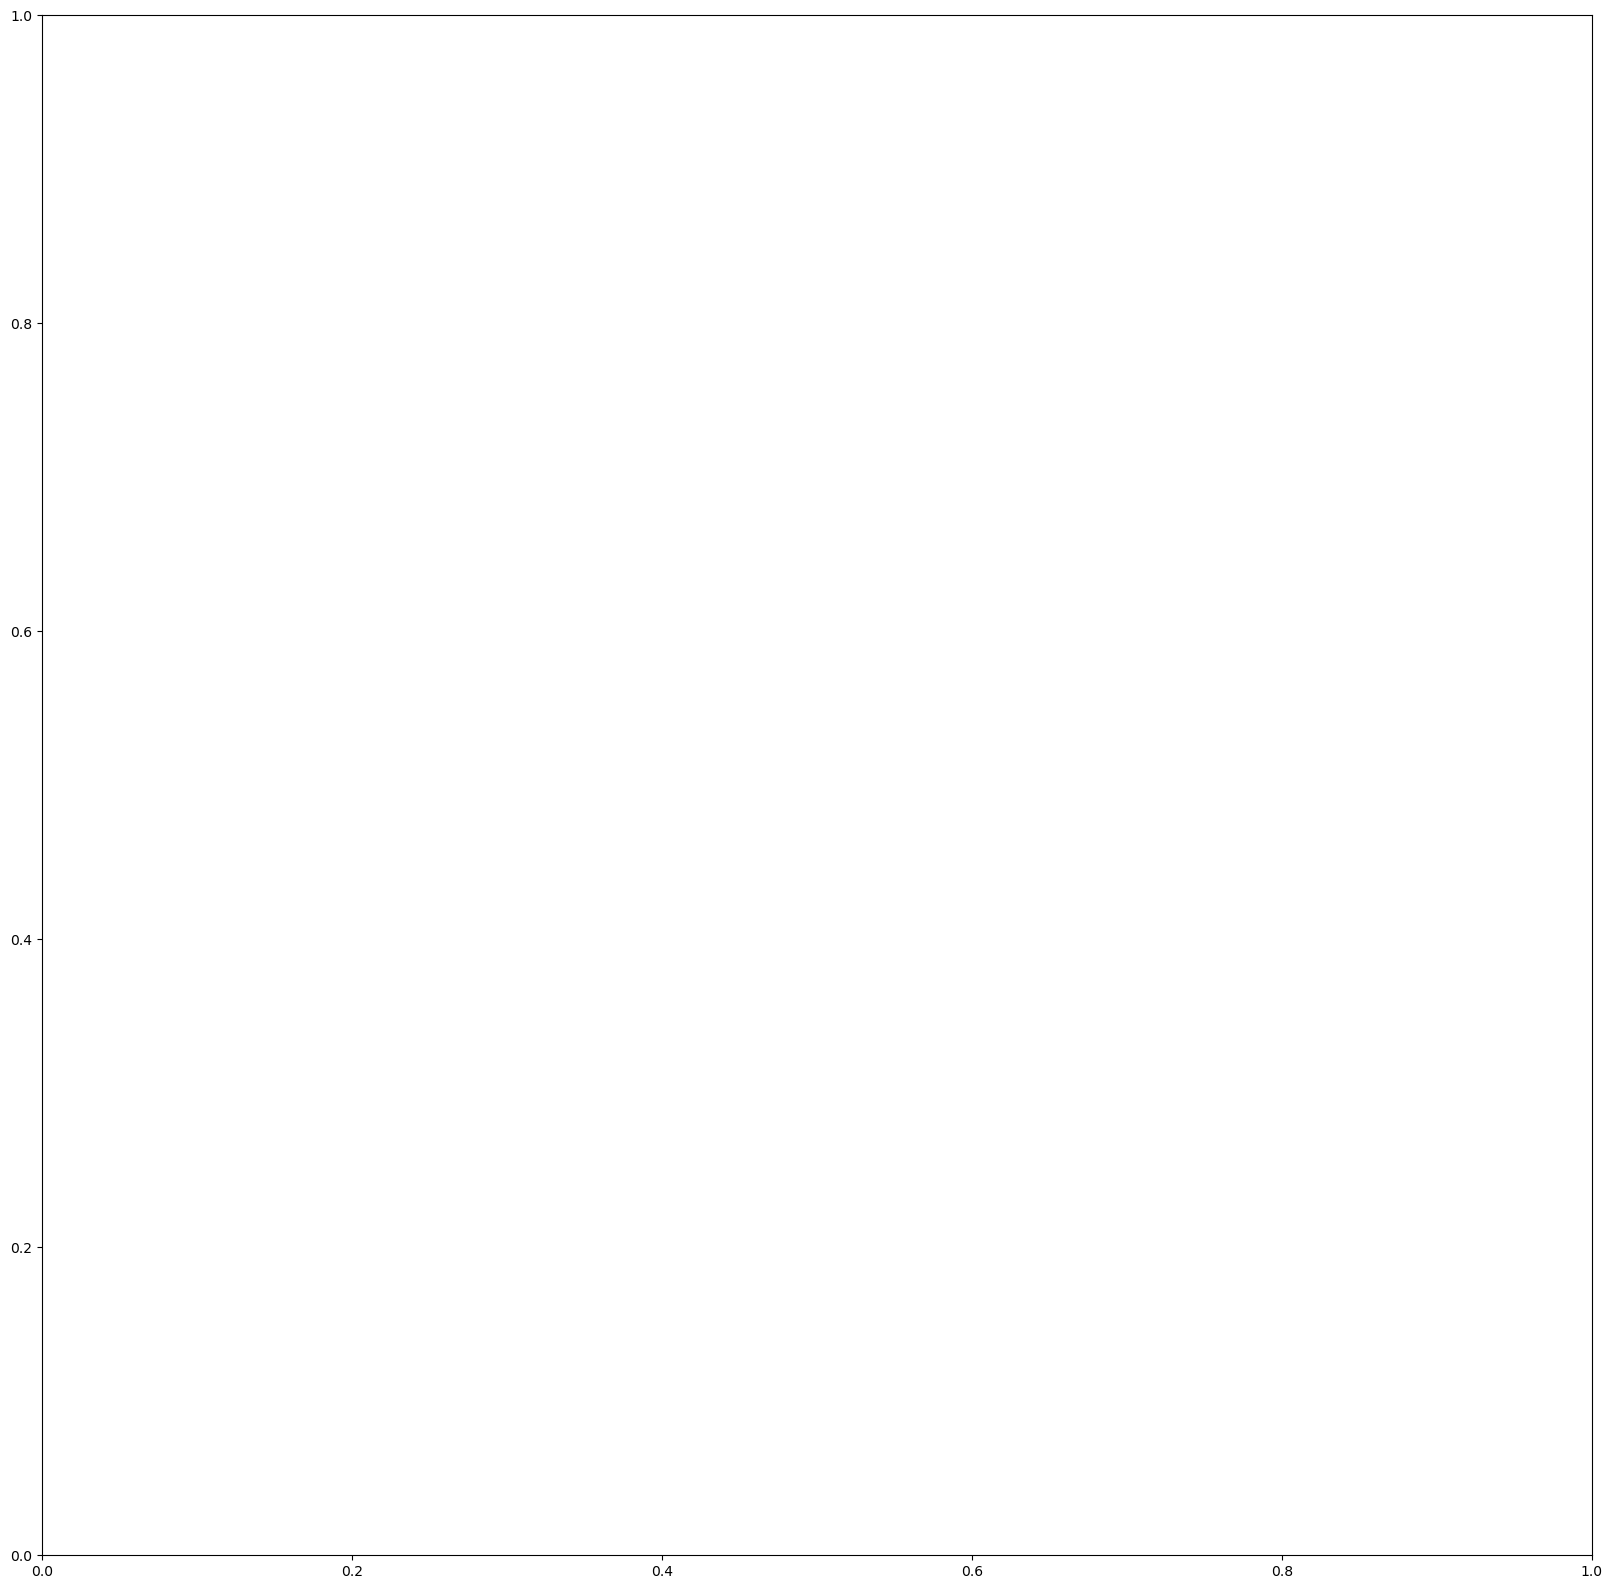

In [217]:
democrat_vax_dict = {'state': vax_democrat_states,
                    'avg vote %': vax_democrat_state_pct}
republican_vax_dict = {'state': vax_republican_states,
                      'avg vote %': vax_republican_state_pct}


democrat_vax_df = pd.DataFrame(democrat_vax_dict)
republican_vax_df = pd.DataFrame(republican_vax_dict)


democrat_vax_map = us_df[us_df['name'].isin(democrat_vax_df['state']) == True]
republican_vax_map = us_df[us_df['name'].isin(republican_vax_df['state']) == True]


# Plot the map with both Democrat and Republican states
fig, ax = plt.subplots(figsize=(20, 20))

# Plot Democrat states in blue
#democrat_vax_map.plot(ax=ax, column='avg vote %', cmap='Blues', edgecolor='black', legend=True)

"""
# Plot Republican states in red
republican_vax_map.plot(ax=ax, column='avg vote %', cmap='Reds', edgecolor='black', legend=True, legend_kwds={'label': "Average Vote Percentage - Republican"})

#set size
plt.xlim(-180, -65)

# Add legend
#legend_handles = [Line2D([0], [0], color='blue', lw=2, label='Democrat'),
#                  Line2D([0], [0], color='red', lw=2, label='Republican')]

# Add legend for the entire figure
#fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(0., 0.5, 0.7, 0.22))

# Show the plot
plt.show()

"""
democrat_vax_map # column = 'avg vote %' is not in this dataframe